In [2]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'D:\data_set\lenta-ru-news.csv'

In [3]:
df = pd.read_csv(filename) 
df.head() 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


# EDA

## Dataset general info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800975 entries, 0 to 800974
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     800975 non-null  object
 1   title   800975 non-null  object
 2   text    800970 non-null  object
 3   topic   738973 non-null  object
 4   tags    773756 non-null  object
 5   date    800975 non-null  object
dtypes: object(6)
memory usage: 36.7+ MB


data is asymmetrically distributed, there is some missing data

In [5]:
df.describe(include=[np.object])

,url,title,text,topic,tags,date
count,800975,800975,800970,738973,773756,800975
unique,800964,797832,800037,23,94,7393
top,https://lenta.ru/news/2001/10/12/anthrax/,В Москве объявлено штормовое предупреждение,"РИА ""Новости""",Россия,Все,2019/12/05
freq,2,21,291,160445,453762,284


Some dublicates in text and title

In [6]:
df.isnull().any()

url      False
title    False
text      True
topic     True
tags      True
date     False
dtype: bool


missing values in text, topic and tags

#### date to Datetime format

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0        1914-09-16
1        1914-09-16
2        1914-09-17
3        1914-09-17
4        1914-09-18
            ...    
800970   2019-12-14
800971   2019-12-14
800972   2019-12-14
800973   2019-12-14
800974   2019-12-14
Name: date, Length: 800975, dtype: datetime64[ns]

#### publications dynamic per mounth

In [8]:
news_per_year = df.groupby(df['date'].dt.year).size()


Text(0, 0.5, 'Number of articles')

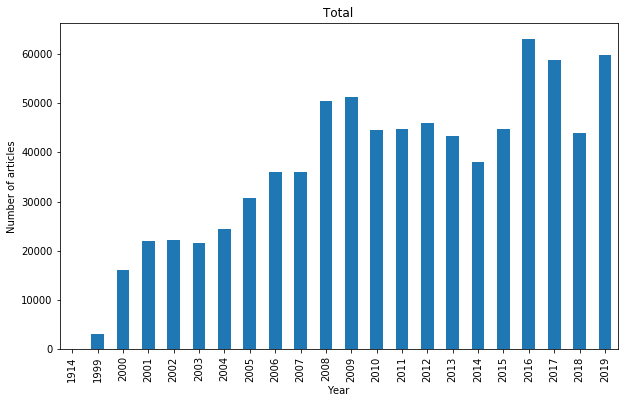

In [9]:
plt.figure(figsize=(10, 6))
fig = news_per_year.plot(kind='bar')
fig.set_title('Total')
fig.set_xlabel('Year')
fig.set_ylabel('Number of articles')

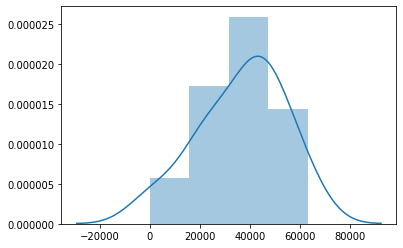

In [10]:
sns_plot = sns.distplot(news_per_year)
fig = sns_plot.get_figure()

#### 1st anomaly: 1914 year of publication

#### sampling all the 1914 news

In [11]:
df.loc[df['date'].dt.year == 1914]

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


#### https://lenta.ru/news/1914/09/16/hungarnn/ Date of publication - 18:20, 16 сентября 2014
#### https://lenta.ru/news/1914/09/17/nesteroff/ Date of publication - 18:35, 17 сентября 2014

In [12]:
df['date'][0:5] = df['date'][:5] + pd.offsets.DateOffset(year=2014)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:692: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df['date'][0:5]

0   2014-09-16
1   2014-09-16
2   2014-09-17
3   2014-09-17
4   2014-09-18
Name: date, dtype: datetime64[ns]

In [14]:
df['date'].value_counts()

2019-12-05    284
2019-12-10    281
2016-12-01    278
2019-10-09    276
2016-11-25    275
             ... 
2000-02-27      1
1999-10-31      1
1999-11-20      1
1999-10-03      1
1999-12-26      1
Name: date, Length: 7390, dtype: int64

#### 2nd anomaly: empty data

In [15]:
df.isna().sum() / df.shape[0] * 100

url      0.000000
title    0.000000
text     0.000624
topic    7.740816
tags     3.398233
date     0.000000
dtype: float64

In [16]:
df = df[df['topic'].notna()]
df = df[df['text'].notna()]
df = df[df['tags'].notna()]

In [17]:
df.isna().sum() / df.shape[0] * 100

url      0.0
title    0.0
text     0.0
topic    0.0
tags     0.0
date     0.0
dtype: float64

## let's take a look at the topics distribution

In [18]:
import numpy as np
df = df.set_index(np.arange(len(df.index)))

Text(0, 0.5, 'Number of articles')

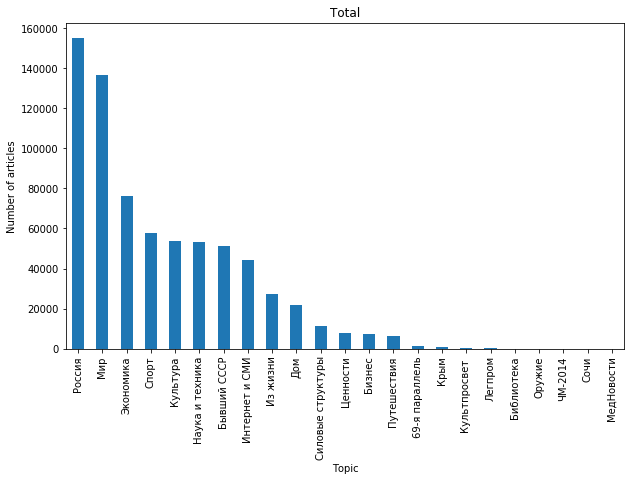

In [19]:
news_per_topic = df.groupby(df['topic']).size().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
fig = news_per_topic.plot(kind='bar')
fig.set_title('Total')
fig.set_xlabel('Topic')
fig.set_ylabel('Number of articles')

1) There are "empty" topics that are rarely presented. 

2) It can be hypothesized that the publication is focused on covering politics, economics and public life in Russia and abroad.

3) The second hypothesis is that the daily life of citizens is less covered

Text(0, 0.5, 'Number of articles')

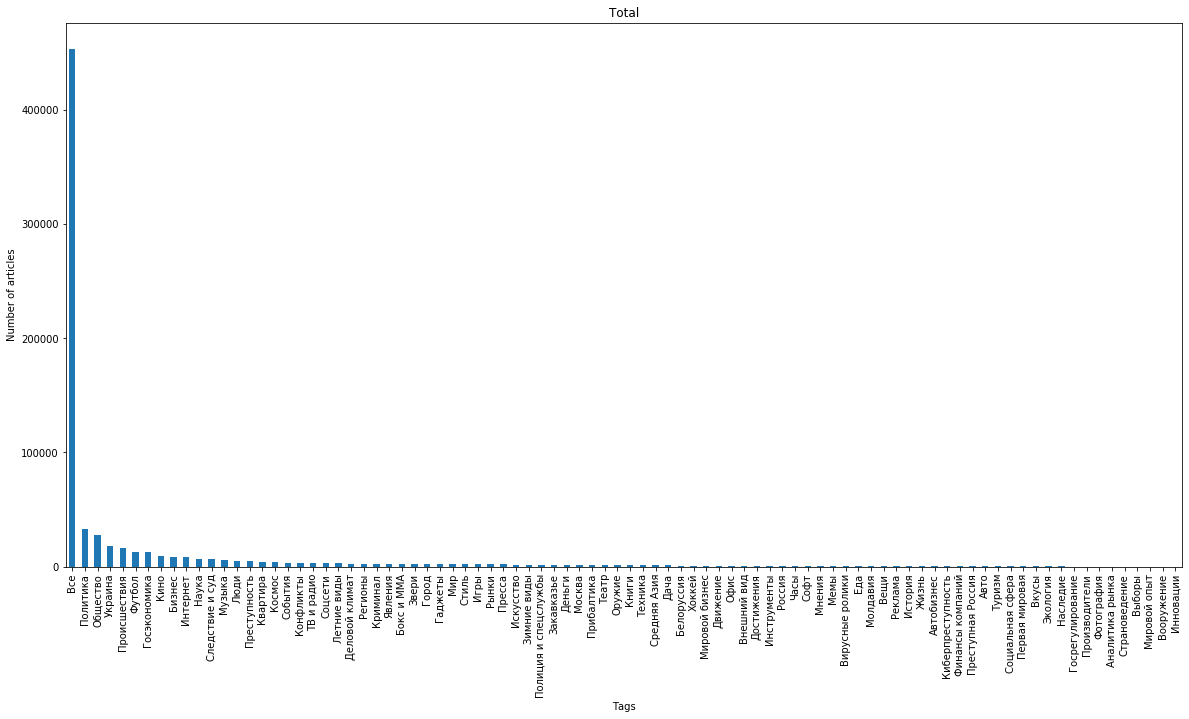

In [20]:
tags_per_topic = df.groupby(df['tags']).size().sort_values(ascending = False)

plt.figure(figsize=(20, 10))
fig = tags_per_topic.plot(kind='bar')
fig.set_title('Total')
fig.set_xlabel('Tags')
fig.set_ylabel('Number of articles')

In [21]:
df.groupby(df['tags']).size().sort_values(ascending = False).nlargest(10)

tags
Все             453581
Политика         33220
Общество         27560
Украина          17934
Происшествия     15972
Футбол           13128
Госэкономика     12869
Кино              9109
Бизнес            8224
Интернет          7945
dtype: int64

We see the distribution by tags gives more information. 
On the one hand, a lot of news is devoted to Ukraine, not only Russia or other countries. 
On the other hand, we see the presence of only the first ten tags, which account for most of the news.


## Let's see what we can learn about article size


In [22]:
df['length']=df['text'].str.len()

In [23]:
df.groupby(['tags'])[['length']].mean().sort_values(['length'], ascending = False)

,length
tags,
Деловой климат,1921.594127
Финансы компаний,1834.658065
Госрегулирование,1783.121951
Производители,1672.000000
Наука,1670.962724
...,...
Футбол,1006.991088
Авто,864.531915
Хоккей,852.577049


Text(0, 0.5, 'length_mean')

<Figure size 720x432 with 0 Axes>

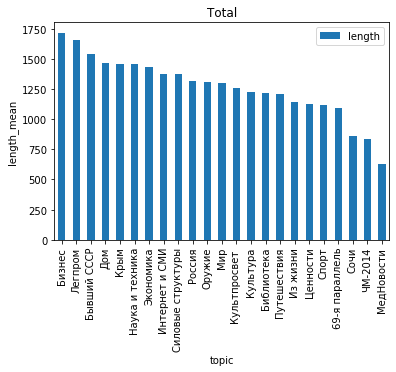

In [24]:
topic_length_mean = df.groupby(['topic'])[['length']].mean().sort_values(['length'], ascending = False)

plt.figure(figsize=(10, 6))
fig = topic_length_mean.plot(kind='bar')
fig.set_title('Total')
fig.set_xlabel('topic')
fig.set_ylabel('length_mean')

In [25]:
df.groupby(['topic']).agg({'length' : [sum, max, min, 'mean', 'median', 'count']}).sort_values(('length', 'max'), ascending=False)

length                                         
                         sum    max  min         mean  median   count
topic                                                                
Россия             204284398  55387    3  1317.929847  1242.0  155004
Бывший СССР         79379206  20090    3  1545.244423  1433.5   51370
Дом                 31845476  14795  181  1465.237692  1372.0   21734
Мир                177459011  13520    3  1298.924103  1242.0  136620
Интернет и СМИ      61088230  12352    3  1375.210599  1290.0   44421
Экономика          109607718   9282    3  1434.224226  1368.0   76423
Спорт               64696755   8494   10  1117.503627  1049.0   57894
Культура            65684449   7739    3  1227.058640  1154.0   53530
Бизнес              12678739   7519  247  1719.151051  1632.0    7375
Наука и техника     77423049   7084    3  1457.073340  1393.0   53136
Из жизни            31421380   5998    3  1142.055755  1100.0   27513
Силовые структуры   15420309   5220  243  1373.991713  1314.0   11223
Ценности             8550439   4771  277  1127.877457  1075.0    7581
69-я параллель       1385923   4680  356  1092.999211  1045.0    1268
Легпром               189348   3963  521  1660.947368  1576.0     114
Путешествия          7724100   3935  279  1212.574568  1177.5    6370
Крым                  973599   3332  420  1461.860360  1409.5     666
Культпросвет          429031   2845  472  1261.855882  1152.5     340
Библиотека             79274   2684  281  1219.600000  1005.0      65
Оружие                  3916   1936  500  1305.333333  1480.0       3
ЧМ-2014                 1668    988  680   834.000000   834.0       2
Сочи                     857    857  857   857.000000   857.0       1
МедНовости               628    628  628   628.000000   628.0       1

# Features extraction

## Text preprocessing

In [26]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
import pymorphy2

In [27]:
punctuation = '—'.join(punctuation)
punctuation = '«'.join(punctuation)
punctuation = '»'.join(punctuation)
punctuation = "„".join(punctuation)
punctuation = '“'.join(punctuation)
morph = pymorphy2.MorphAnalyzer()
stopwords = stopwords.words('russian') + [a for a in punctuation]

In [28]:
def tokenizer(text):
    tokens_clean = []
    tokens = word_tokenize(text = text)
    for token in tokens:
        if token not in stopwords:
            form = morph.parse(token)[0].normal_form
            tokens_clean.append(form)
    return tokens_clean

In [ ]:
%%time
df['clean_text'] = df['text'].apply(tokenizer)
df


The text is not clean enough. It will be necessary to clear the found characters additionally

Caught a memory error several times. Perhaps list comprehensions would make the task a little easier. I have succesfully tested algoritm on a smaller random samples from the dataset.

In [ ]:
df.head()

## Topics extarction

In [ ]:
all_tokens_list = []
for i in df['clean_text']:
    all_tokens_list.append(i)

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim import models
from gensim.models import LdaModel, LdaMulticore
from gensim.models import LsiModel
import pickle
from pprint import pprint

### LDA model

In [ ]:
mydict = corpora.Dictionary(all_tokens_list)
mycorpus = [mydict.doc2bow(doc) for doc in all_tokens_list]
import pickle
pickle.dump(mycorpus, open('corpus1.pkl', 'wb'))
mydict.save('dictionary1.gensim')
ldamodel = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                               id2word=mydict,
                                               num_topics=10,
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
ldamodel.save('lda_model_10.gensim')
pprint(ldamodel.print_topics())

#### topics visualization

### LSI model

In [ ]:
dictionary = corpora.Dictionary(all_tokens_list)
corpus = [dictionary.doc2bow(text) for text in all_tokens_list]
tfidf = models.TfidfModel(corpus, smartirs = 'ntc')
tfidf_model = tfidf[corpus]
lsi_model = LsiModel(corpus = tfidf_model, id2word = dictionary, num_topics = 7, decay = 0.5)
pprint(lsi_model.print_topics(-1, 10))